**02장 - 사이킷런으로 시작하는 머신러닝**

**02-01** 사이킷런 소개와 특징

- **사이킷런(Scikit-learn)**
     : 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
    - 파이썬 기반의 머신 러닝을 위한 가장 쉽고 효율적인 개발 라이브러리 제공.

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn

In [ ]:
sklearn.__version__ # 사이킷런 버전 확인

'1.2.2'

**02-02** 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기

붓꽃 데이터 세트로 붓꽃의 품종을 분류(Classification)하는 것.

- **분류(Classification)**
    - 대표적인 **지도학습(Supervised Learning)** 방법 중 하나
        - 레이블(Label; 다양한 피처와 분류 결정값) 데이터로 모델 학습, 테스트 데이터 세트에서 미지의 레이블 예측

In [ ]:
from sklearn.datasets import load_iris # 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier # 알고리즘 의사 결정 트리 불러오기
from sklearn.model_selection import train_test_split # 데이터 세트를 학습 데이터+테스트 데이터로 분리

In [ ]:
import pandas as pd

In [ ]:
iris = load_iris() # 붓꽃 데이터 세트 불러오기

iris_data = iris.data # 피처 데이터
iris_label = iris.target # 레이블 데이터

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names) # 데이터 프레임 변환
iris_df['label'] = iris.target

iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# 학습(train) 데이터와 테스트(test) 데이터로 분리
# x: 피처, y: 레이블

# 학습 데이터 80%, 테스트 데이터 20%로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

# test_size = n 에서 n은 테스트 데이터 세트의 비율
# random_state = n 에서 n은 어떤 값이든 상관없음(난수 발생 값)

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

In [ ]:
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 예측 수행
pred = dt_clf.predict(X_test)

In [ ]:
# 예측 성능 평가
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


**분류 예측 프로세스 정리**
- 데이터 세트 분리
- 모델 학습
- 예측 수행
- 평가

**02-03** 사이킷런의 기반 프레임워크 익히기

- **Estimator 클래스** : 지도학습의 모든 알고리즘을 구현한 클래스
    - **CLassifier** : 분류 알고리즘을 구현한 클래스
    - **Regressor** : 회귀 알고리즘을 구현한 클래스
    - fit(  ), predict(  )를 내부에서 구현
    - evaluation 함수, 하이퍼 파라미터 튜닝 지원 클래스에서 인자로 받음
    - 비지도학습(차원 축소, 클러스터링, 피처 추출 등) 구현 클래스에서도 적용.
        - fit(  ) : 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
        - transform(  ) : 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등 실제 작업 수행



- **사이킷런의 주요 모듈**

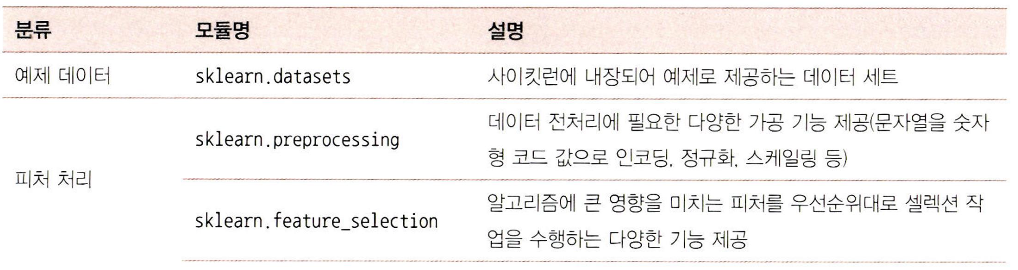

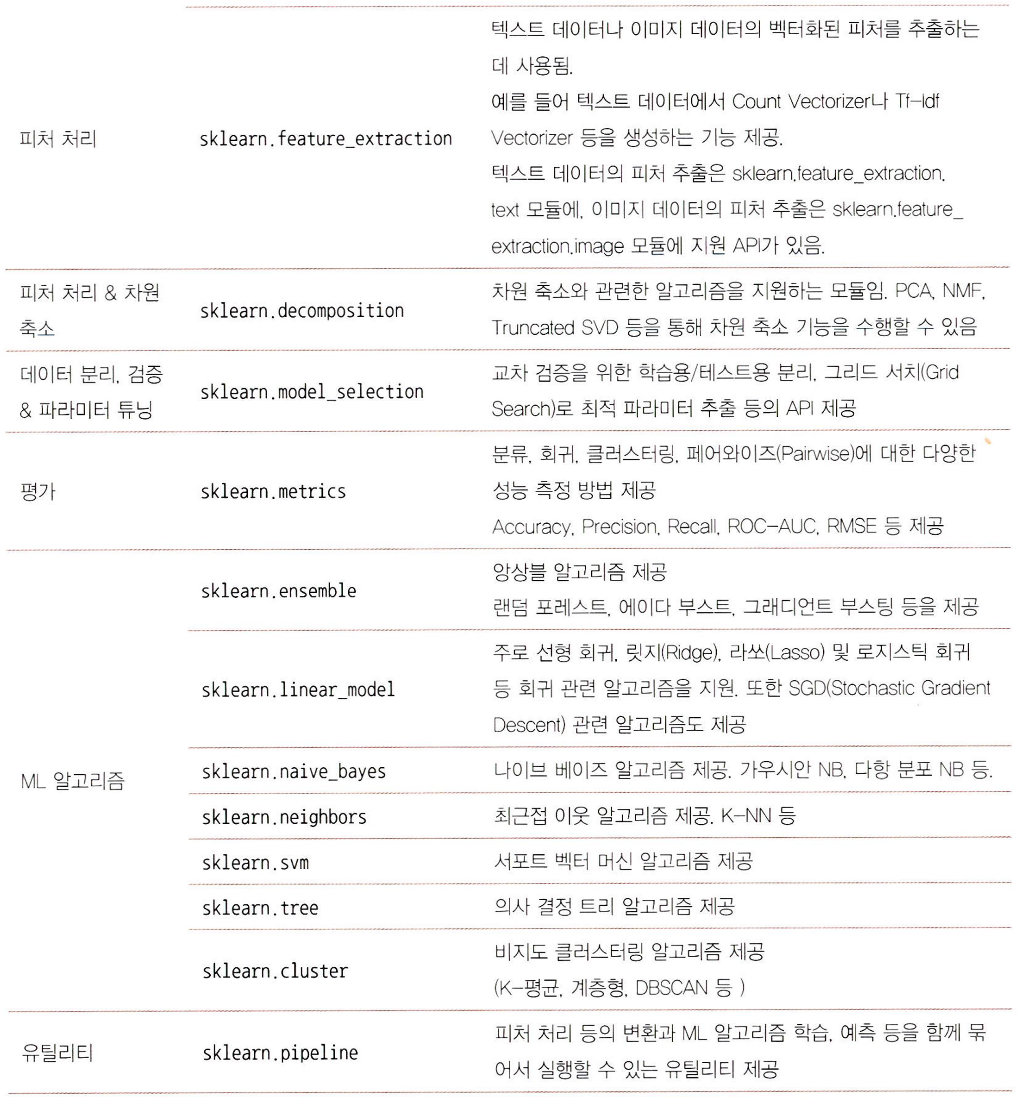

**내장된 예제 데이터 세트**

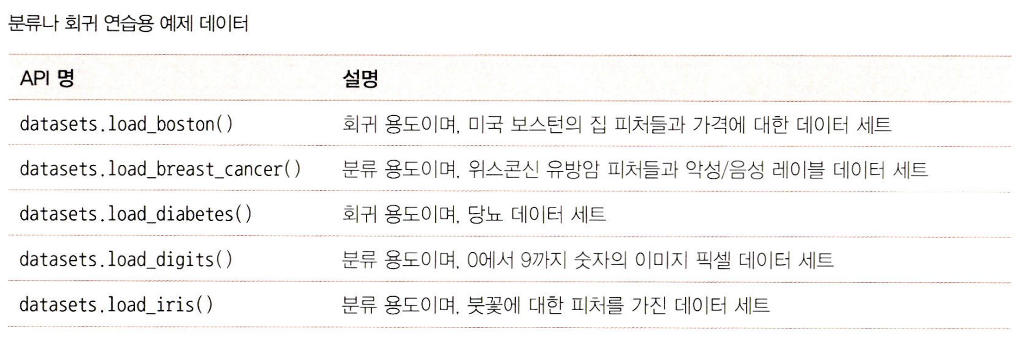

*분류와 클러스터링을 위한 표본 데이터 생성기*
- datasets.make_classifications(  ) : 분류를 위한 데이터 세트 생성
- datasets.make_blobs(  ) : 클러스터링을 위한 데이터 세트 무작위 생성

**키(Key)**
- data: 피처의 데이터 세트
    - 넘파이 배열(ndarray) 타입
- target: *분류* 시 레이블 값, *회귀* 시 숫자 결괏값 데이터 세트
    - 넘파이 배열(ndarray) 타입
- target_names: 개별 레이블의 이름
    - 넘파이 배열(ndarray) 타입
    - 파이썬 리스트(list) 타입
- feature_names: 피처의 이름
    - 넘파이 배열(ndarray) 타입
    - 파이썬 리스트(list) 타입
- DESCR: 데이터 세트에 대한 설명과 각 피처의 설명
    - 스트링 타입

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print("\n feature name:", iris_data.feature_names) # feature name
print("\n shape:", len(iris_data.feature_names)) # feature name의 shape
print("\n type:", type(iris_data.feature_names)) # feature name의 type

print("\n target name:", iris_data.target_names) # target name
print("\n shape:", len(iris_data.target_names)) # target name의 shape
print("\n type:", type(iris_data.target_names),'\n') # target name의 type

print("\n data:", iris_data.data) # data
print("\n shape:", len(iris_data.data)) # data의 shape
print("\n type:", type(iris_data.data),'\n') # data의 type

print("\n target:", iris_data.target) # target
print("\n shape:", len(iris_data.target)) # target의 shape
print("\n type: ", type(iris_data.target),'\n') # target의 type


 feature name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 shape: 4

 type: <class 'list'>

 target name: ['setosa' 'versicolor' 'virginica']

 shape: 3

 type: <class 'numpy.ndarray'> 


 data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5

**02-04** Model Selection 모듈 소개

- **train_test_split(  )**: 학습/테스트 데이터 세트 분리

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

# 예측 정확도 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:  0.9556


**교차 검증**

: 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행하는 것
- 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것.
    - 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 쉽게 할 수 있음.

**K 폴드 교차 검증**

: 가장 보편적으로 사용되는 교차 검증 방법

: k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법.

In [3]:
# K 폴드 교차 검증 프로세스 구현 - KFold & StratifiedKFold 클래스 활용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


In [7]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print ("\n#{0} 교차검증정확도:{1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스:{1}".format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))


#1 교차검증정확도:1.0, 학습데이터 크기: 120, 검증데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증정확도:0.9667, 학습데이터 크기: 120, 검증데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증정확도:0.8667, 학습데이터 크기: 120, 검증데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증정확도:0.9333, 학습데이터 크기: 120, 검증데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증정확도:0.7333, 학습데이터 크기: 120, 검증데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


**Stratified K 폴드**

: 불균형한 분포도를 가진 레이블 데이터 집합을 위한 k 폴드 방식

- 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함.
- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌.


In [8]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [10]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('##교차검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n' , label_train.value_counts())
    print('검증 레이블 데이터 분포: \n' , label_test.value_counts())
    iris_df['label'].value_counts()

##교차검증:1
학습 레이블 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64
##교차검증:2
학습 레이블 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64
##교차검증:3
학습 레이블 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


In [12]:
# StratifiedKFold를 수행하여 데이터 분할 후, 학습/검증 레이블 데이터의 분포도 확인하기
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('\n 교차검증:{0}'.format(n_iter))
    print('학습레이블데이터분포:\n', label_train.value_counts())
    print('검증레이블데이터분포:\n', label_test.value_counts())


 교차검증:1
학습레이블데이터분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증레이블데이터분포:
 0    17
1    17
2    16
Name: label, dtype: int64

 교차검증:2
학습레이블데이터분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증레이블데이터분포:
 0    17
2    17
1    16
Name: label, dtype: int64

 교차검증:3
학습레이블데이터분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증레이블데이터분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [20]:
# StratifiedKFold를 이용한 데이터 분리

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split( ) 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도:{1}, 학습데이터크기:{2},검증데이터크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도: ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도:0.98, 학습데이터크기:100,검증데이터크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도:0.94, 학습데이터크기:100,검증데이터크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도:0.98, 학습데이터크기:100,검증데이터크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도:  [0.98 0.94 0.98]
## 평균 검증 정확도:  0.9666666666666667


**교차 검증을 보다 간편하게- cross_val_score()**

: 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API

    cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,pre_dispatch='2*n_jobs')
- 주요 파라미터: estimator, X, y, scoring, cv

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data =load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)
data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


**GridSearchCV- 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

In [24]:
# 파라미터 집합 만들고 순차적으로 적용하며 최적화 수행하기
grid_parameters = {'max_depth': [1, 2, 3],
                    'min_samples_split': [2, 3]}

In [25]:
# GridSearch API 사용법

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
# refit = True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과를 추출해 Dataframe으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [26]:
# 최적 하이퍼 파라미터의 값과 그때의 정확도 알아보기
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [27]:
# 데이터 세트 예측, 성능 평가

# Gridsearchcv의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# Gridsearchcv의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


**02-05** 데이터 전처리(Data Preprocessing)

- 결손값(NaN, Null)은 허용되지 않음
    - 고정된 다른 값으로 변환해야 함
- 문자열 값을 입력 값으로 허용하지 않음


**데이터 인코딩**
- 레이블 인코딩(Label encoding)

    : 카테고리 피처를 코드형 숫자 값으로 변환하는  것
- 원-핫 인코딩(One Hot encoding)




**레이블 인코딩**
- LabelEncoder 클래스로 구현
    - fit(  )
    - transform(  )

In [28]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit( )과 transform( )으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:' , labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [31]:
# 속성값 확인
print('인코딩 클래스: ', encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [33]:
# 디코딩 원본값 확인
print('디코딩 원본값: ', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환.


**원-핫 인코딩(One-Hot Encoding)**

: 피처값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

: 행 형태로 돼 있는 피처의 고유값을 열 형태로 차원을 변환한 뒤, 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

In [34]:
# OneHotEncoder를 이용해 앞의 데이터를 원-핫 인코딩으로 변환해보겠습니다.
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)

# 원- 핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())

print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [37]:
# 원-핫 인코딩을 더 쉽게 지원하는 API - get_dummies()

import pandas as pd

df = pd.DataFrame({'item': ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


**피처 스케일링과 정규화**

- 표준화를 통해 변환될 피처 $x$의 새로운 $i$
번째 데이터를 $x_inew$라고 하자.

$x_inew = \frac{x_i - mean(x)}{stdev(x)}$

- 새로운 데이터 $x_inew$는 원래 값에서 피처 $x$의 최솟값을 뺀 값을 피처 $i$의 최댓값과 최솟값의 차이로 나눈 값으로 변환 가능

$x_inew = \frac{x_i - min(x)}{max(x)-min(x)}$

- 정규화

$x_inew = \frac{x_i}{\sqrt {(x_i^2+y_i^2+z_i^2)}}$



**StandardScaler**

: 표준화를 쉽게 지원하기 위한 클래스

- 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해줌.
- 가우시안 정규 분포를 따름.

In [38]:
# StandardSclaer가 어떻게 데이터 값을 변환하는지 확인하기

from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())

print('\n feature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [39]:
# DataFrame으로 변환해 재확인하기
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit( )과 transform( ) 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
# transform( )시 스케일 변환된 데이터 세트가 Numpyndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris. feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


**MinMaxScaler**

: 데이터값을 0과 1 사이의 범위값으로 변환

In [40]:
# MinMaxScaler 작동 메커니즘 확인
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform( ) 시 스케일 변환된 데이터 세트가 NumPyndarray로 반환돼 이를 Dataframe으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최솟값' )
print(iris_df_scaled.min())

print('\nfeature들의 최댓값' )
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

: 학습 데이터로 fit(  )이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할수있음.

In [42]:
# 테스트 데이터에 fit()을 적용할 때 생기는 문제점

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 1).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature range 파라미터값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit() 하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1 로 변환됨.
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [0]
Scale된 train_array 데이터: [0.]


In [43]:
# MinMaxScaler에 test_array를 fit() 하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터 : ' , np.round(test_array.reshape(-1) ,2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [45]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터: ', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [0]
Scale된 train_array 데이터: [0.]

원본 test_array 데이터:  [0 1 2 3 4 5]
Scale된 test_array 데이터: [0. 1. 2. 3. 4. 5.]


**02-06** 사이킷런으로 수행하는 타이타닉 생존자 예측(실습)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features (df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#### **03장 예측**


**03-01** 정확도(Accuracy)

$정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$

: 직관적으로 모델 예측 성능을 나타내는 평가 지표

In [23]:
# 타이타닉 생존자 예측 수행

from sklearn.base import BaseEstimator
class MyDummyClassifier(BaseEstimator):
    # fit( ) 메서드는 아무것도 학습하지않음.
    def fit(self, X, y=None):
        pass

# predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 원본 데이터 재로딩 , 데이터 가공 , 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# dummy classifier를 이용한 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('DummyCLassifier의 정확도는:{0:.4f}'.format(accuracy_score(y_test,mypredictions)))

DummyCLassifier의 정확도는:0.7877


In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
# 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()
# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)


# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


**03-02** 오차 행렬(Confusion Matrix)

: 학습된 분류모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표

: 이진분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

- TN: 예측값을 Negative값 0으로 예측했고 실제값 역시 Negative값 0
- FP: 예측값을 Positive값 1로 예측했는데 실제값은 Negative값 0
- FN: 예측값을 Negative값 0으로 예측했는데 실제값은 Posifive값 1
- TP: 예측값을 Postive값 1로 예측했는데 실제값 역시 Postive값 1


In [35]:
# MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현해보기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

    정확도 = 예측 결과와 실제값이 동일한 건수/전체 데이터수 = (TN+TP)/(TN+FP+FN+TP)

**03-03** 정밀도와 재현율

    정밀도 = TP / ( FP + TP )
    재현율 = TP / ( FN + TP )

- 정밀도: 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
- 재현율:  실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율

    - 모두 TP를 높이는 데 초점을 둠
        - 재현율을 FN을 낮추는데 초점을 둠
        - 정밀도는 FP를 낮추는데 초점을 둠


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f},재현율:{2:.4f}'.format(accuracy, precision, recall))

In [38]:
# 로지스틱 회귀 기반 타이타닉 생존자 예측, confusion matrix, accuracy, precision, recall 평가 진행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742,재현율:0.7869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**정밀도/재현율 트레이드오프**

: 정밀도와 재현율은 상호 보완적인 평가지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다는 것.

In [40]:
pred_proba = lr_clf .predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n : ' , pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스값으로 예측 \n',pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 :  [[0.46197474 0.53802526]
 [0.87872398 0.12127602]
 [0.87719492 0.12280508]]
두 개의 class 중에서 더 큰 확률을 클래스값으로 예측 
 [[0.46197474 0.53802526 1.        ]
 [0.87872398 0.12127602 0.        ]
 [0.87719492 0.12280508 0.        ]]


In [41]:
# 정밀도와 재현율 곡선 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

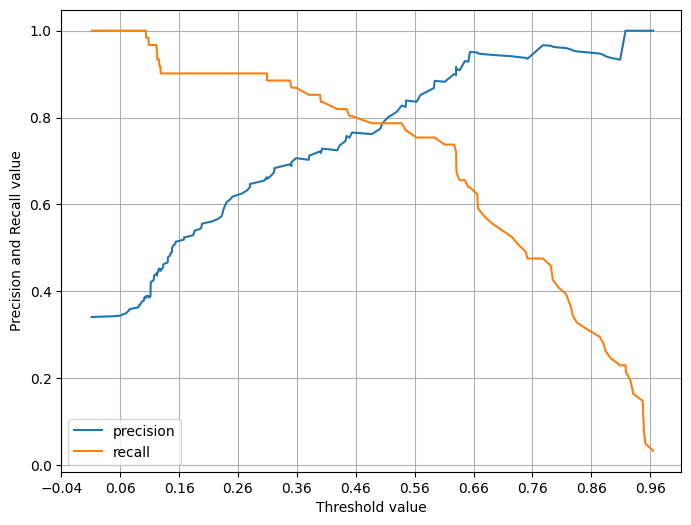

In [46]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

def precision_recall_curve_plot(y_test, pred_proba_c1):
# threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

# X축을 threshold 값으로, Y축은 정밀도, 재현율값으로 각각 Plot 수행.
# 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

# threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# X축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

**정밀도와 재현율의 맹점**

: 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함

**정밀도가 100%가 되는 방법**

: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측하면 됨

**재현율이 100%가 되는 방법**

: 모든 환자를 Positive로 예측하면 됨


**03-04** F1 스코어

$F1 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}} = 2 * \frac{precision*recall}{precision+recall}$

- **F1 스코어**: 정밀도와 재현율을 결합한 지표
    - 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

In [47]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


In [50]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
#get_eval_by_threshold(y_test, pred_proba[:, 1], reshape(-1, 1), thresholds)

**03-05** ROC 곡선과 AUC

- **ROC 곡선**: 수신자 판단 곡선
    - 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
    - FPR(FalsePositiveRate)이 변할 때 TPR(True PositiveRate, 재현율)이 어떻게 변하는지를 나타내는 곡선
- **AUC 스코어**: 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

        FPR = FP / (FP + TN) =1 - TNR = 1 - 특이성

In [51]:
# FPR, TPR, 임곗값 구하기

from sklearn.metrics import roc_curve

# 레이블값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


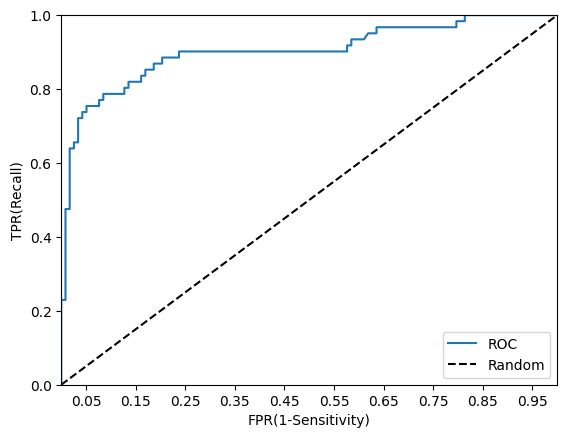

In [52]:
# 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [55]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print ('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

**03-06** 피마 인디언 당뇨병 예측(실습)